<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None  
pd.options.display.float_format = '{:.6f}'.format
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from pandas.api.types import is_string_dtype
from sklearn.feature_selection import RFE

In [2]:
plt.rcParams['figure.figsize'] = [10,5]

#### Read the data

Load the csv file and print the first five observations.

In [3]:
df = pd.read_csv('bank_churn.csv')

In [4]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9920 entries, 0 to 9919
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CreditScore       9920 non-null   int64  
 1   Geography         9920 non-null   object 
 2   Gender            9920 non-null   object 
 3   Age               9920 non-null   int64  
 4   NumOfYrsWithBank  9920 non-null   int64  
 5   Balance           9920 non-null   float64
 6   NumOfProducts     9920 non-null   int64  
 7   HasCrCard         9920 non-null   int64  
 8   Closed_Acc        9920 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 697.6+ KB


#### Data Preparation

In [5]:
# convert the columns that are wrongly specified as numeric to object type 
df['NumOfYrsWithBank']=df['NumOfYrsWithBank'].astype(object)
df['NumOfProducts']=df['NumOfProducts'].astype(object)
df['HasCrCard']=df['HasCrCard'].astype(object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9920 entries, 0 to 9919
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CreditScore       9920 non-null   int64  
 1   Geography         9920 non-null   object 
 2   Gender            9920 non-null   object 
 3   Age               9920 non-null   int64  
 4   NumOfYrsWithBank  9920 non-null   object 
 5   Balance           9920 non-null   float64
 6   NumOfProducts     9920 non-null   object 
 7   HasCrCard         9920 non-null   object 
 8   Closed_Acc        9920 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 697.6+ KB


#### Missing value analysis

In [7]:
num_df = df.select_dtypes(include = np.number)
cat_df=  df.select_dtypes(exclude=np.number)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9920 entries, 0 to 9919
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CreditScore       9920 non-null   int64  
 1   Geography         9920 non-null   object 
 2   Gender            9920 non-null   object 
 3   Age               9920 non-null   int64  
 4   NumOfYrsWithBank  9920 non-null   object 
 5   Balance           9920 non-null   float64
 6   NumOfProducts     9920 non-null   object 
 7   HasCrCard         9920 non-null   object 
 8   Closed_Acc        9920 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 697.6+ KB


In [8]:
# isnull().sum(): calculate the null values in each column for dataset
# sort_values(ascending=False): sort the values in descending order of values
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
CreditScore,0,0.000000
Geography,0,0.000000
Gender,0,0.000000
Age,0,0.000000
NumOfYrsWithBank,0,0.000000
Balance,0,0.000000
NumOfProducts,0,0.000000
HasCrCard,0,0.000000
Closed_Acc,0,0.000000


In [9]:
df.shape

(9920, 9)

Our objective is to predict whether the customer has closed the bank account or not.

**The data definition is as follows:** <br>

**CreditScore**: Credit score of the customer 

**Geography**: Resident country of the customer

**Gender**: Gender of the customer

**Age**: Age of the customer

**NumOfYrsWithBank**: Years for which the customer has been with the bank

**Balance**: Bank balance of the customer in Euro

**NumOfProducts**: Number of bank facilities for which customer has opted

**HasCrCard**: Whether the customer has credit card or not (1 = Yes, 0 = No)

**Closed_Acc**: Whether the customer has closed the bank account or not (1 = Yes, 0 = No) (target/dependent variable)

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Is the target variable imbalanced? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

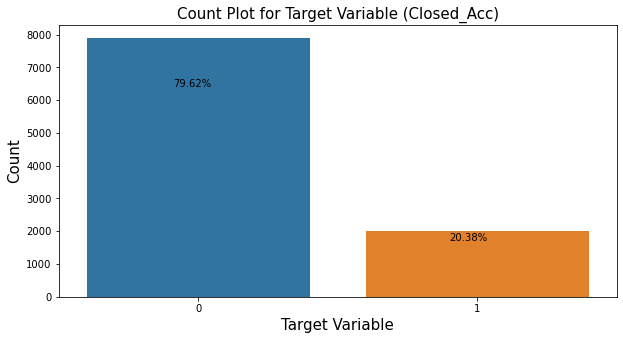

In [10]:
df_target = df['Closed_Acc']
df_target.value_counts()
sns.countplot(x = df_target)
plt.text(x = -0.09, y = df_target.value_counts()[0] - 1500, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.text(x = 0.90, y = df_target.value_counts()[1] - 300, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')
plt.title('Count Plot for Target Variable (Closed_Acc)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()
# Target variable is imbalacned 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a full logistic model and calculate the odds for each variable (consider the probability  threshold as 0.25)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9920 entries, 0 to 9919
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CreditScore       9920 non-null   int64  
 1   Geography         9920 non-null   object 
 2   Gender            9920 non-null   object 
 3   Age               9920 non-null   int64  
 4   NumOfYrsWithBank  9920 non-null   object 
 5   Balance           9920 non-null   float64
 6   NumOfProducts     9920 non-null   object 
 7   HasCrCard         9920 non-null   object 
 8   Closed_Acc        9920 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 697.6+ KB


In [12]:
df_numeric = df.select_dtypes(include=np.number).drop(["Closed_Acc"],axis=1)
num_scaled=df_numeric.apply(lambda rec:rec-rec.mean()/rec.std(),axis=0)
df_num = pd.DataFrame(num_scaled, columns = df_numeric.columns)

In [14]:
df_categorical = df.select_dtypes(include="object")
df_cat = pd.get_dummies(df_categorical, drop_first=True)
X = pd.concat([df_num,df_cat],axis=1)
y = df.Closed_Acc
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, random_state = 1, test_size = 0.2)
logreg_full = sm.Logit(y_train_full, X_train_full).fit()
y_pred_prob_full = logreg_full.predict(X_test_full)
y_pred = [ 0 if x < 0.25 else 1 for x in y_pred_prob_full]
print(logreg_full.summary())

         Current function value: 0.389982
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:             Closed_Acc   No. Observations:                 7936
Model:                          Logit   Df Residuals:                     7916
Method:                           MLE   Df Model:                           19
Date:                Wed, 05 Jan 2022   Pseudo R-squ.:                  0.2268
Time:                        22:21:46   Log-Likelihood:                -3094.9
converged:                      False   LL-Null:                       -4002.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
CreditScore            -0.0031      0.000    -13.482      0.000      -0.004      -0.003
Age                     0.0586      0.

D:\DSE\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [15]:
df_odds = pd.DataFrame(np.exp(logreg_full.params), columns= ['Odds']) 
df_odds

,Odds
CreditScore,0.996931
Age,1.060346
Balance,0.999998
Geography_Germany,2.502048
Geography_Spain,0.931004
Gender_Male,0.544223
NumOfYrsWithBank_1,0.429021
NumOfYrsWithBank_2,0.425497
NumOfYrsWithBank_3,0.421132
NumOfYrsWithBank_4,0.492603


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Calculate the Specificity and Sensitivity from the confusion matrix of the full model (consider the probability threshold as 0.25)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
print(classification_report(y_test_full,y_pred))
print(confusion_matrix(y_test_full,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85      1572
           1       0.47      0.67      0.55       412

    accuracy                           0.78      1984
   macro avg       0.69      0.74      0.70      1984
weighted avg       0.81      0.78      0.79      1984

[[1268  304]
 [ 138  274]]


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Build a logistic model on the 6 features obtained by RFE and plot the ROC curve 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [33]:
lr = LogisticRegression()
lr.fit(X_train_full,y_train_full)
from sklearn.feature_selection import RFE
lr_rfe=RFE(estimator=lr,n_features_to_select=6)
rfe_model = lr_rfe.fit(X_train_full,y_train_full)
rfe_rank=pd.DataFrame()
rfe_rank['Rank']= rfe_model.ranking_
rfe_rank['Feature']= X.columns
features_rfe_rank=rfe_rank[rfe_rank['Rank']==1]['Feature']

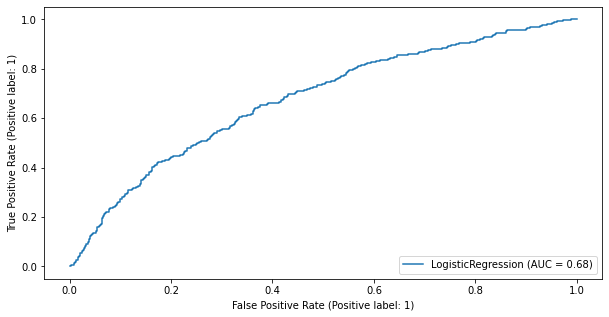

In [44]:
x = X[['Geography_Germany', 'Gender_Male', 'NumOfYrsWithBank_7',
       'NumOfProducts_2', 'NumOfProducts_3', 'NumOfProducts_4']]
y = df.Closed_Acc
X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X, y, random_state = 1, test_size = 0.2)
lr_rfe =  LogisticRegression()
log_rfe=lr_rfe.fit(X_train_rfe,y_train_rfe)
y_pred_prob_rfe = logreg_full.predict(X_test_rfe)
# fpr1, tpr1, thresholds1 = roc_curve(y_test_rfe, y_pred_prob_rfe)
# plt.plot(fpr1, tpr1)
from sklearn.metrics import plot_roc_curve 
prc =plot_roc_curve(log_rfe,X_test_rfe,y_test_rfe)
# auc IS 68 %

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Obtain the optimal value of cut-off probability for the full model using the Youden's index 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [47]:
fpr, tpr, thresholds = roc_curve(y_test_full, y_pred_prob_full)
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'

youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

# sort the dataframe based on the values of difference 
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.703883,0.220102,0.230745,0.483782
1,0.711165,0.227735,0.224186,0.483430
2,0.706311,0.223282,0.228158,0.483028
3,0.708738,0.227099,0.226150,0.481639
4,0.735437,0.253817,0.204547,0.481620


In [48]:
y_pred_thresh = [ 0 if x < 0.230745 else 1 for x in y_pred_prob_full]

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Consider the cut-off probability obtained from Youden's index for the full model and calculate the following measures:<br>
                    a. f-1 score <br>
                    b. Accuracy<br>
                    c. Kappa Score
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [50]:
print("F-1 Score",f1_score(y_test_full,y_pred_thresh))
print("Accuracy:",accuracy_score(y_test_full,y_pred_thresh))
print("Kappa Score:",cohen_kappa_score(y_test_full,y_pred_thresh))

F-1 Score 0.5534351145038168
Accuracy: 0.7641129032258065
Kappa Score: 0.4029506779974896


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Identify the variables involved in multicollinearity 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vf=[ vif(X.values,i) for i in range(X.shape[1]) ]
pd.DataFrame(vf,index=X.columns,columns=['vif'])
# Credit Score is involved in multicollinearity.

,vif
CreditScore,22.939498
Age,11.205214
Balance,3.399721
Geography_Germany,1.793329
Geography_Spain,1.490756
Gender_Male,2.184890
NumOfYrsWithBank_1,2.840359
NumOfYrsWithBank_2,2.897143
NumOfYrsWithBank_3,2.806286
NumOfYrsWithBank_4,2.763476


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build a logistic regression model using the categorical variables and the variables obtained after calculating VIF. Also, plot the ROC curve and compute the AUC score (consider the cut-off probability as 0.6)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

AUC Score: 0.6057492774030979


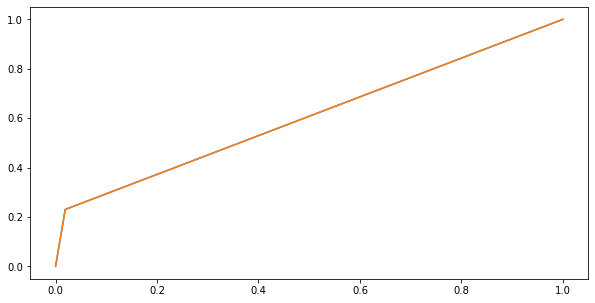

In [71]:
x = X.drop(columns='CreditScore')
y = df.Closed_Acc
X_train_vif, X_test_vif, y_train_vif, y_test_vif = train_test_split(X, y, random_state = 1, test_size = 0.2)
lr_vif =  LogisticRegression()
log_vif=lr_vif.fit(X_train_vif,y_train_vif)
y_pred_prob_vif = logreg_full.predict(X_test_vif)

y_pred_vif = [ 0 if x < 0.6 else 1 for x in y_pred_prob_vif]
fpr_vif, tpr_vif, thresholds_vif = roc_curve(y_test_vif, y_pred_vif)
plt.plot(fpr_vif, tpr_vif)
from sklearn.metrics import auc,roc_auc_score
print("AUC Score:",auc(fpr_vif, tpr_vif))
plt.plot(fpr_vif, tpr_vif)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Consider the costs of false negatives and false positives as 2 and 0.5 respectively to obtain the optimal cut-off probability for which the total cost will be minimum
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [72]:
def calculate_total_cost(actual_value, predicted_value, cost_FN, cost_FP):
    cm = confusion_matrix(actual_value, predicted_value)           
    cm_array = np.array(cm)
    return cm_array[1,0] * cost_FN + cm_array[0,1] * cost_FP

df_total_cost = pd.DataFrame(columns = ['cut-off', 'total_cost'])
i = 0
for cut_off in range(10, 50):
    total_cost = calculate_total_cost(y_test_full,  y_pred_prob_full.map(lambda x: 1 if x > (cut_off/100) else 0), 2, 0.5) 
    df_total_cost.loc[i] = [(cut_off/100), total_cost] 
    i += 1
    
# sort the dataframe based on the 'total_cost' in the ascending order
# print the first five rows in the dataframe
df_total_cost.sort_values('total_cost', ascending = True).head()

,cut-off,total_cost
13,0.230000,417.500000
9,0.190000,421.500000
10,0.200000,422.000000
12,0.220000,422.500000
11,0.210000,422.500000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a full logistic model using the optimal cut-off probability obtained in Q9. Also, plot the confusion matrix and ROC curve along with the AUC score  
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

AUC Score: 0.7415727908298131


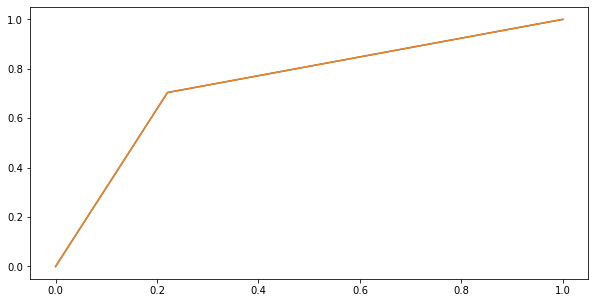

In [76]:
x = df.drop(columns='Closed_Acc')
y = df.Closed_Acc
X_train_q, X_test_q, y_train_q, y_test_q = train_test_split(X, y, random_state = 1, test_size = 0.2)
lr_q =  LogisticRegression()
log_q=lr_q.fit(X_train_q,y_train_q)
y_pred_prob_q = logreg_full.predict(X_test_q)

y_pred_q = [ 0 if x < 0.23 else 1 for x in y_pred_prob_q]
fpr_q, tpr_q, thresholds_q = roc_curve(y_test_q, y_pred_q)
plt.plot(fpr_q, tpr_q)
from sklearn.metrics import auc,roc_auc_score
print("AUC Score:",auc(fpr_q, tpr_q))
plt.plot(fpr_q, tpr_q)
plt.show()

In [82]:
confusion_matrix(y_test_q,y_pred_q)

array([[1225,  347],
       [ 122,  290]], dtype=int64)

In [83]:
1225/1347,290/637

(0.9094283593170007, 0.4552590266875981)